In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### loading the dataset 'fuel_data.csv' into pandas dataframe 
#and checking the head.

fuel = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

fuel.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
# checking for details about the dataset

fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


##### The Dataset has 29,523 data-points(rows) and 11 features(columns).

## Creating an identity matrix

In [4]:
# an identity matrix can be created using the "identity" function

np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### other ways listed in the option are invalid. Below are the reasons:
##### 1. np.array([1,0,0],[0,1,0],[0,0,1]) : another square bracket is needed in order for "array" function to take the whole matrix as an object
##### 2. np.array[(1,0,0),(0,1,0),(0,0,1)] : a matrix can only be created using square brackets, not parentheses
##### 3. eye(3) : 'eye' function in numpy can be used in creating an identity matrix, but in this case, the library 'numpy' was not called which made it invalid

## Percentage change in fuel cost per unit burned in 1998 compared to 1994 for coal

In [5]:
# grouping the fuel type code

fuel.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [6]:
# extracting observations where only fuel type 'coal' is used and assigning it to variable "coal"

coal = fuel[fuel['fuel_type_code_pudl']=='coal']
coal.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850


In [7]:
# calculating the sum of all fuel cost per unit burned in 1998

fuel_cost_1998 = coal[coal['report_year']==1998]['fuel_cost_per_unit_burned'].sum()
print(fuel_cost_1998)

11902.597


In [8]:
# calculating the sum of all fuel cost per unit burned in 1994

fuel_cost_1994 = coal[coal['report_year']==1994]['fuel_cost_per_unit_burned'].sum()
print(fuel_cost_1994)

14984.572000000002


$$ percentagechange = \frac{(fuel_cost_1998) - (fuel_cost_1994)}{(fuel_cost_1994)}100$$

In [9]:
# Percentage change in fuel cost per unit burned in 1998 compared to 1994 

percent_change = 100 * ((fuel_cost_1998 - fuel_cost_1994) / fuel_cost_1994)
print(percent_change)

-20.56765451826053


##### The percentage change in 1998 compared to 1994 is -21% (21% decrease)

## Second and third lowest correlation with the fuel cost per unit burned

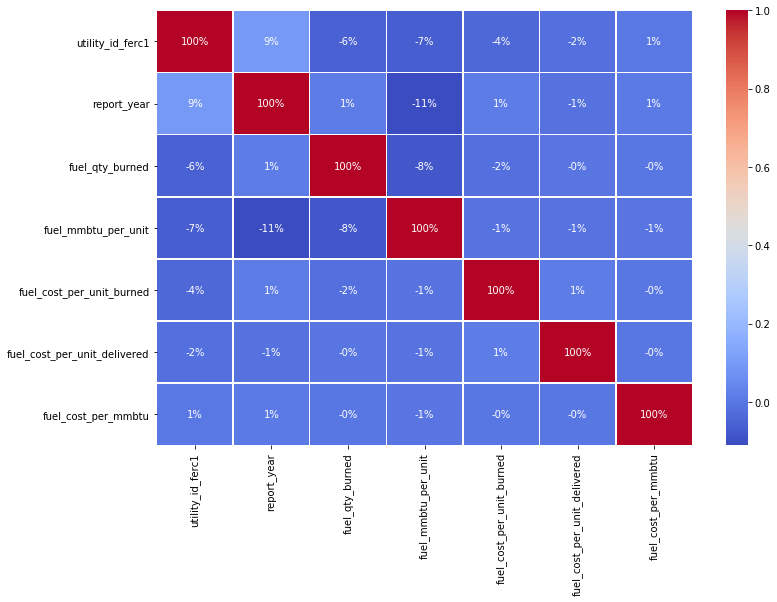

In [10]:
# correlation heatmap for all features

plt.subplots(figsize=(12,8))

sns.heatmap(fuel.corr(), cmap='coolwarm',annot=True,linewidths=0.5,fmt='.0%')

In [11]:
# correlation dataframe between each numerical features

fuel_corr = fuel.corr()
fuel_corr

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [12]:
# sorting the correlation values for 'fuel_cost_per_unit_burned' in ascending order

sort_corr = fuel_corr['fuel_cost_per_unit_burned'].sort_values()
sort_corr

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [13]:
# picking the Second and third lowest correlation with the fuel cost per unit burned

second = sort_corr[1:2]
print('second lowest correlation ---- '+ str(second)+'\n')

third = sort_corr[2:3]
print('third lowest correlation ---- '+ str(third))

second lowest correlation ---- fuel_qty_burned   -0.018535
Name: fuel_cost_per_unit_burned, dtype: float64

third lowest correlation ---- fuel_mmbtu_per_unit   -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64


##### 2nd lowest correlation feature =====>  'fuel_qty_burned'
##### 3rd lowest correlation feature =====>  'fuel_mmbtu_per_unit'

## Missing Values

In [14]:
# checking for the total missing values for each features

fuel.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [15]:
# percentage of the missing rows as a factor of the total number of rows in three decimal places

missing_percent = (180/29523) * 100
print('percentage of missing rows = '+str(missing_percent)+'%')
print('in 3 decimal places---'+str(round(missing_percent,3))+'%')

percentage of missing rows = 0.609694136774718%
in 3 decimal places---0.61%


##### The feature 'fuel_unit' has 180 missing values
##### Total number of missing values is 180
##### Percentage of missings rows = 0.610%(to 3 decimal places)

In [16]:
# by using 'groupby()' function, we can count each unique value
# in the 'fuel_unit' column to know how the missing values can be managed

fuel.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [17]:
# filling the missing values with the most common(mode) value in the column "mcf"

fuel[['fuel_unit']] = fuel[['fuel_unit']].fillna(value='mcf')

In [18]:
#check if missing values have been filled
# it should all be zero now

fuel.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

##### The feature 'fuel_unit' with the missing values is Catagorical and the technique used is Mode Imputation

## Report year with the highest average fuel cost per unit delivered

In [19]:
# grouping the data by the report year and computing the mean for each year

avg_fuel_cost = fuel.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()
print(avg_fuel_cost)

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64


In [20]:
# selecting the year with the highest average fuel cost per unit delivered

avg_fuel_cost.idxmax()

1997

##### Year 1997 has the highest average fuel cost per unit delivered

## Skewness and Kurtosis for the fuel quantity burned

In [21]:
# calculating the skewness for the fuel quatity burned to two decimal places

fuel_skewness = pd.DataFrame((fuel['fuel_qty_burned'])).skew()
round(fuel_skewness,2)

fuel_qty_burned    15.85
dtype: float64

In [22]:
# calculating the kurtosis for the fuel quatity burned to two decimal places

fuel_kurtosis = pd.DataFrame((fuel['fuel_qty_burned'])).kurtosis()
round(fuel_kurtosis,2)

fuel_qty_burned    651.37
dtype: float64

##### skewness for the fuel quantity burned = 15.85 
##### Kurtosis for the fuel quantity burned = 651.37

## Standard deviation and 75th percentile of the measure of energy per unit 

In [23]:
# standard deviation of the measure of energy per unit in two decimal places

fuel_standard = np.std(fuel['fuel_mmbtu_per_unit'])
print(round(fuel_standard,2))

10.6


In [24]:
# 75th percentile of the measure of energy per unit in two decimal places

fuel_percentile = np.percentile((fuel['fuel_mmbtu_per_unit']), 75)
print(round(fuel_percentile,2))

17.01


##### Standard deviation of the measure of energy per unit = 10.60
##### 75th percentile of the measure of energy per unit = 17.01

## Fuel type code with the lowest average fuel cost per unit burned

In [25]:
# grouping the data by the each fuel type code and computing the mean for each

avg_fuel_burned = fuel.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()
print(avg_fuel_burned)

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64


In [26]:
# selecting the fuel type code with the lowest average fuel cost per unit burned

avg_fuel_burned.idxmin()

'gas'

##### GAS has the lowest average fuel cost per unit burned

## Creating a new list from the elements of two given list A and B

In [27]:
# two given lists A and B 

A = [1, 2, 3, 4, 5, 6]
print(A)

B = [13, 21, 34]
print(B)

[1, 2, 3, 4, 5, 6]
[13, 21, 34]


In [28]:
# adding the list 'B' to 'A'

A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [29]:
# saving the new list 'A' to the variable "A_B'

A_B = A
print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]
